# Python 101 - Numerical Methods

In [1]:
import numpy as np
import sympy
from matplotlib import pyplot as plt
from scipy import integrate

## Exercise ODEs

*Sympy* is a *python* package similar to the known *Matematica* package to have symbolic representation of equation and by using other packages as *numpy* or *scipy* solve them.

In our case we are interested in ODEs

## a) Get ODE close form solution

Let's consider a basic ODE with a bounded solution (closed-form solution), Newton's cooling Law:

$$ \frac{dT(t)}{dt} = -k \left( T(t) - T_a \right) $$

with boundary condition of $ T(0)=T_0 $

In [2]:
# Define Variables
t, k, T0, Ta, T_ = sympy.symbols("t, k, T_0, T_a T_")
T = sympy.Function("T")

In [3]:
# Create the ODE
ode = T(t).diff(t) + k * (T(t) - Ta)
sympy.Eq(ode, 0)

Eq(k*(-T_a + T(t)) + Derivative(T(t), t), 0)

In [4]:
# Solve the ODE
ode_sol = sympy.dsolve(ode)
ode_sol

Eq(T(t), C1*exp(-k*t) + T_a)

In [5]:
# We define the boundary conditions
ics = {T(0): T0}
C_eq = sympy.Eq(ode_sol.lhs.subs(t, 0).subs(ics), ode_sol.rhs.subs(t, 0))
C_eq

Eq(T_0, C1 + T_a)

In [6]:
# Solve C1
C_sol = sympy.solve(C_eq)
C_sol

[{C1: T_0 - T_a}]

In [7]:
# The closed form solution looks like
ode_sol = ode_sol.subs(C_sol[0])
ode_sol

Eq(T(t), T_a + (T_0 - T_a)*exp(-k*t))

## b) Solve the ODE numerically

In [8]:
# Some values for initial conditions
ics_ = {
    Ta :273,
    T0 : 300,
    k : 1
       }

In [9]:
# Using lambdify for exact solution
ode_sol_np = sympy.lambdify((t, k, T0, Ta), ode_sol.rhs)
# Our ODE
ode_ = (-k * (T(t) - Ta))
ode_np = sympy.lambdify((T(t), t, k, Ta), ode_)

In [10]:
# Let have a range of our domain
t_ = np.linspace(0, 15 , 100)

In [11]:
T_t = integrate.odeint(ode_np, ics_[T0], t_, args=(ics_[k], ics_[Ta]))
T_t = np.array(T_t).flatten()
sol_np = ode_sol_np(t_, ics_[k], ics_[T0], ics_[Ta])

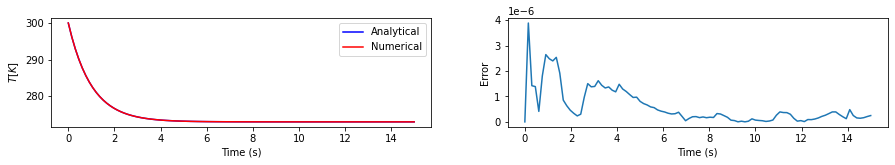

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,2))
ax[0].plot(t_, sol_np, '-b',label="Analytical")
ax[0].plot(t_, T_t, '-r',label="Numerical")
ax[0].legend();
ax[0].set_ylabel(r'$T[K]$');
ax[0].set_xlabel("Time (s)");
ax[1].plot(t_, np.abs(sol_np - T_t));
ax[1].set_ylabel("Error");
ax[1].set_xlabel("Time (s)");

## c) Solve system of ODEs

Now we consider the Lokta-Volterra equation for the dynamics of a population of predator and prey animals. For example, rabbits and foxes (x, y respectively):

$$ \frac{dx}{dt} = ax - bxy $$

$$ \frac{dy}{dt} = cxy - dy $$

In [13]:
t, a, b, c, d = sympy.symbols("t, a, b, c, d")

In [14]:
def ode_sys_np(xy, t, a, b, c, d):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

In [15]:
ics = { 
    'xy0': [600, 400],
    a: 0.4, # Rate at which rabbits are born
    b: 0.002, # Rate at which foxes consume rabbits
    c: 0.001, # Rate at which fox populations grow at the expense of the rabbits
    d: 0.7, # Rate at which foxes die
}
t_ = np.linspace(0, 50 , 250)

In [16]:
xy_t = integrate.odeint(ode_sys_np, ics['xy0'], t_, args=(ics[a], ics[b], ics[c], ics[d]))

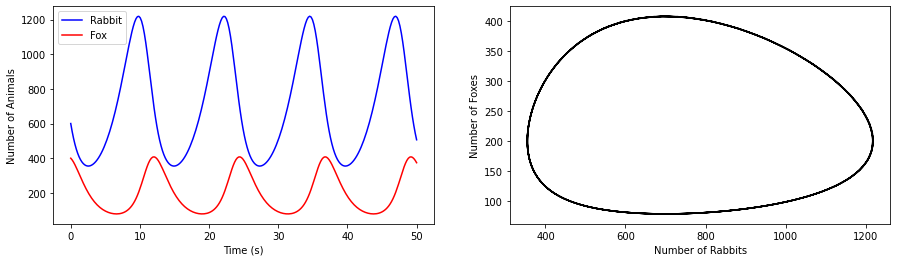

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax[0].plot(t_, xy_t[:, 0], '-b',label="Rabbit")
ax[0].plot(t_, xy_t[:, 1], '-r',label="Fox")
ax[0].legend();
ax[0].set_ylabel(r'Number of Animals');
ax[0].set_xlabel("Time (s)");
ax[1].plot(xy_t[:, 0], xy_t[:, 1], 'k');
ax[1].set_ylabel("Number of Foxes");
ax[1].set_xlabel("Number of Rabbits");

## d) Solve the Lorenz ODEs

The Lorenz Equations are a system of three coupled, first-order, nonlinear differential equations which describe the trajectory of a particle through time. 

$$\frac{dx}{dt}= \sigma(y - x)$$

$$\frac{dy}{dt} = x(\rho - z) - y$$

$$\frac{dz}{dt} = xy - \beta z$$

In [19]:
t, sigma, rho, beta = sympy.symbols("t, 𝜎, 𝜌, 𝛽")

In [20]:
def ode_sys_np(xyz, t, sigma, rho, beta):
    x, y, z = xyz
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

In [21]:
ics = { 
    'xyz0': [1, 1, 1],
    sigma: 8,
    rho: 28,
    beta: 8/3,
}
t_ = np.linspace(0, 25, 10000)

In [22]:
xyz_t = integrate.odeint(ode_sys_np, ics['xyz0'], t_, args=(ics[sigma], ics[rho], ics[beta]))

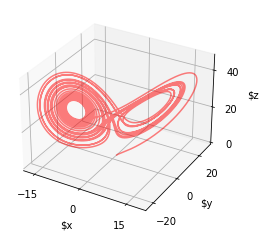

In [23]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), subplot_kw={'projection': '3d'})
ax.plot(xyz_t[:,0], xyz_t[:,1], xyz_t[:,2], 'r', alpha=0.5)
ax.set_xlabel(r'$x');
ax.set_ylabel(r'$y');
ax.set_zlabel(r'$z');
ax.set_xticks([-15, 0, 15]);
ax.set_yticks([-20, 0, 20]);
ax.set_zticks([0, 20, 40]);

In [24]:
xyz_t

array([[ 1.        ,  1.        ,  1.        ],
       [ 1.0006454 ,  1.06494494,  0.99592837],
       [ 1.00256333,  1.12982427,  0.99204911],
       ...,
       [ 8.24107531,  0.37581998, 33.24826554],
       [ 8.08425596,  0.27008384, 33.03388556],
       [ 7.92851375,  0.17091205, 32.81876072]])